In [2]:
# importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [3]:
# load train and test data
train = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Data_Test.xlsx')

In [4]:
# concatenate train and test for cleaning
data = pd.concat([train,test],sort=False)

In [5]:
data["Average_Cost"]= data["Average_Cost"].str.replace("₹","")
data["Minimum_Order"]= data["Minimum_Order"].str.replace("₹","")
data["Delivery_Time"]= data["Delivery_Time"].str.replace("minutes","")

In [6]:
data['City.Pune'] = data['Location'].apply(lambda x: 'Pune' if 'Pune' in x else None)
data['City.Kolkata'] = data['Location'].apply(lambda x: 'Kolkata' if 'Kolkata' in x else None)
data['City.Mumbai'] = data['Location'].apply(lambda x: 'Mumbai' if 'Mumbai' in x else None)
data['City.Bangalore'] = data['Location'].apply(lambda x: 'Bangalore' if 'Bangalore' in x else None)
data['City.Delhi'] = data['Location'].apply(lambda x: 'Delhi' if 'Delhi' in x else None)
data['City.Hyderabad'] = data['Location'].apply(lambda x: 'Hyderabad' if 'Hyderabad' in x else None)
data['City.Noida'] = data['Location'].apply(lambda x: 'Noida' if 'Noida' in x else None)
data['City.Gurgaon'] = data['Location'].apply(lambda x: 'Gurgaon' if 'Gurgaon' in x else None)
data['City.Majestic'] = data['Location'].apply(lambda x: 'Bangalore' if 'Majestic' in x else None)
data['City.Marathalli'] = data['Location'].apply(lambda x: 'Bangalore' if 'Marathalli' in x else None)
data['City.Electronic'] = data['Location'].apply(lambda x: 'Bangalore' if 'Electronic' in x else None)
data['City.Gurgoan'] = data['Location'].apply(lambda x: 'Gurgaon' if 'Gurgoan' in x else None)
data['City.Whitefield'] = data['Location'].apply(lambda x: 'Bangalore' if 'Whitefield' in x else None)

data['City'] = data['City.Pune'].map(str)+data['City.Kolkata'].map(str)+data['City.Mumbai'].map(str)+data['City.Bangalore'].map(str)+data['City.Delhi'].map(str)+data['City.Hyderabad'].map(str)+data['City.Noida'].map(str)+data['City.Gurgaon'].map(str)+data['City.Majestic'].map(str)+data['City.Marathalli'].map(str)+data['City.Electronic'].map(str)+data['City.Gurgoan'].map(str)+data['City.Whitefield'].map(str)

data['City'] = data['City'].apply(lambda x: x.replace('None',''))

In [7]:
data = data[['Restaurant','City','Cuisines','Average_Cost', 'Minimum_Order', 'Rating', 'Votes', 'Reviews', 'Delivery_Time']]
data[0:5]

,Restaurant,City,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,Pune,"Fast Food, Rolls, Burger, Salad, Wraps",200,50,3.5,12,4,30
1,ID_2882,Bangalore,"Ice Cream, Desserts",100,50,3.5,11,4,30
2,ID_1595,Mumbai,"Italian, Street Food, Fast Food",150,50,3.6,99,30,65
3,ID_5929,Noida,"Mughlai, North Indian, Chinese",250,99,3.7,176,95,30
4,ID_6123,Bangalore,"Cafe, Beverages",200,99,3.2,521,235,65


In [8]:
# defining the count function for cuisine 
def countoc(s):
    a=s.split(',')
    return len(a)

data['Count Cuisine'] = data['Cuisines'].apply(lambda x:countoc(x))

cols = ['Average_Cost', 'Minimum_Order', 'Rating', 'Votes', 'Reviews', 'Delivery_Time']
data[cols] = data[cols].apply(pd.to_numeric,errors='coerce')

In [9]:
# checking null values
data.isnull().sum()

Restaurant          0
City                0
Cuisines            0
Average_Cost       31
Minimum_Order       0
Rating           2470
Votes            2616
Reviews          2905
Delivery_Time    2774
Count Cuisine       0
dtype: int64

In [10]:
# removing null values
data['Average_Cost'] = data['Average_Cost'].fillna(data['Average_Cost'].median())
data['Rating'] = data['Rating'].fillna(data['Rating'].median())
data['Votes'] = data['Votes'].fillna(data['Votes'].median())
data['Reviews'] = data['Reviews'].fillna(data['Reviews'].median())

In [11]:
data.isna().sum()

Restaurant          0
City                0
Cuisines            0
Average_Cost        0
Minimum_Order       0
Rating              0
Votes               0
Reviews             0
Delivery_Time    2774
Count Cuisine       0
dtype: int64

In [12]:
# split the data into train test
train= data[:11094]
test= data[11094:]

In [13]:
# get dummies for city column
X=train[['City','Average_Cost', 'Minimum_Order', 'Rating', 'Votes', 'Reviews', 'Count Cuisine']]
y=train['Delivery_Time']
X=pd.get_dummies(data=X, drop_first=True)

X1=test[['City','Average_Cost', 'Minimum_Order', 'Rating', 'Votes', 'Reviews', 'Count Cuisine']]
y1=test['Delivery_Time']
X1=pd.get_dummies(data=X1, drop_first=True)

# EDA

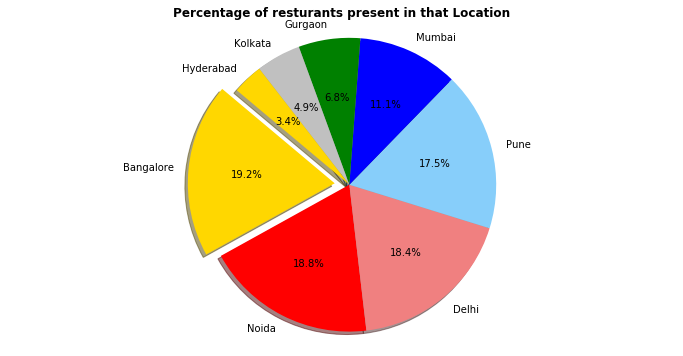

In [15]:
plt.figure(figsize=(12,6))
names = train['City'].value_counts()[:10].index
values = train['City'].value_counts()[:10].values
colors = ['gold','red','lightcoral','lightskyblue','blue','green','silver']
explode = (0.1,0,0,0,0,0,0,0)
plt.pie(values,explode=explode,labels=names,colors=colors,autopct='%1.1f%%',shadow =True,startangle=140)
plt.axis('equal')
plt.title('Percentage of resturants present in that Location', weight='bold')
plt.show()

Text(0.5, 0, 'Delivery_Time')

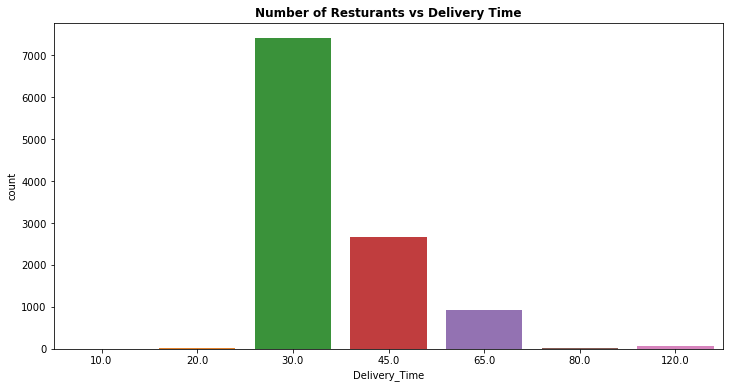

In [24]:
plt.figure(figsize=(12,6))
ax1=sns.countplot(train['Delivery_Time'])
plt.title('Number of Resturants vs Delivery Time', weight='bold')
plt.xlabel('Delivery_Time')

Text(0.5, 1.0, 'City vs Delivery Time distribution')

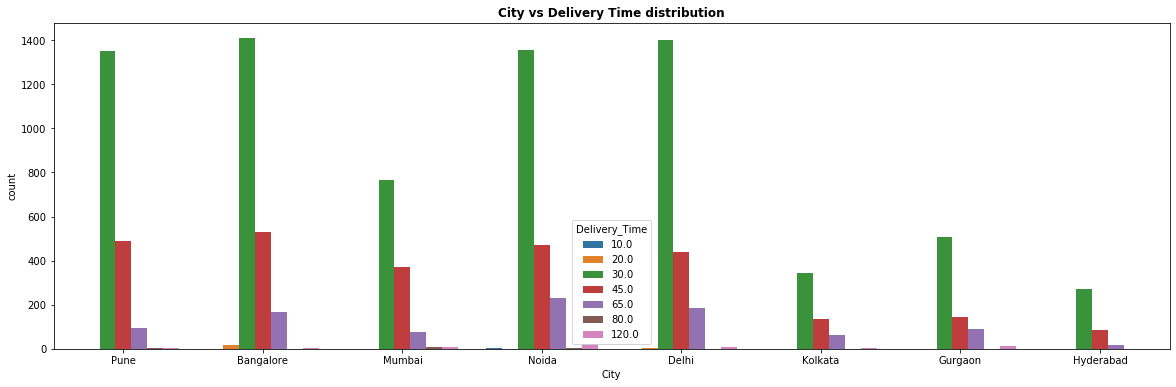

In [26]:
plt.figure(figsize=(20,6))
ax2 = sns.countplot(x='City',hue='Delivery_Time',data=train)
plt.title('City vs Delivery Time distribution',weight='bold')

## Splitting Train Data

In [13]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# KNN Model

In [15]:
classifier_KNN = KNeighborsClassifier(n_neighbors=1)
classifier_KNN.fit(X_train, y_train)

train_score_knn=classifier_KNN.score(X_train,y_train)
test_score_knn=classifier_KNN.score(X_test,y_test)
print("Test Score {} Train Score {} ".format(test_score_knn,train_score_knn))

Test Score 0.7381703470031545 Train Score 0.9808450704225352 


In [18]:
print(classification_report(y, classifier_KNN.predict(X)))

              precision    recall  f1-score   support

        10.0       1.00      0.50      0.67         4
        20.0       0.73      0.80      0.76        20
        30.0       0.96      0.96      0.96      7406
        45.0       0.89      0.89      0.89      2665
        65.0       0.85      0.88      0.87       923
        80.0       0.76      0.93      0.84        14
       120.0       0.94      0.81      0.87        62

    accuracy                           0.93     11094
   macro avg       0.88      0.82      0.84     11094
weighted avg       0.93      0.93      0.93     11094



# XGBoost

In [14]:
classifier_xgb = XGBClassifier(learning_rate=0.99,random_state=0)
classifier_xgb.fit(X_train, y_train)

train_score_xgb=classifier_xgb.score(X_train,y_train)
test_score_xgb=classifier_xgb.score(X_test,y_test)
print("Test Score {} Train Score {} ".format(test_score_xgb,train_score_xgb))

Test Score 0.7309598918431726 Train Score 0.8498028169014085 


In [15]:
parameters=[{'learning_rate':[0.6,0.8,0.99,1,2],'random_state':[0,1,2,3]}]

grid_search= GridSearchCV(estimator= classifier_xgb,param_grid=parameters,scoring='accuracy',cv=5,n_jobs= -1)

grid_search=grid_search.fit(X_train, y_train)
best_accuracy_xgb=grid_search.best_score_
best_parameters_xgb=grid_search.best_params_

C:\Users\sanket\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [16]:
best_accuracy_xgb

0.7445633802816902

In [17]:
best_parameters_xgb

{'learning_rate': 0.99, 'random_state': 0}

In [18]:
print(classification_report(y, classifier_xgb.predict(X)))

              precision    recall  f1-score   support

        10.0       1.00      0.50      0.67         4
        20.0       0.94      0.75      0.83        20
        30.0       0.85      0.94      0.89      7406
        45.0       0.74      0.63      0.68      2665
        65.0       0.80      0.46      0.58       923
        80.0       1.00      0.93      0.96        14
       120.0       0.96      0.76      0.85        62

    accuracy                           0.83     11094
   macro avg       0.90      0.71      0.78     11094
weighted avg       0.82      0.83      0.82     11094



# Random Forest

In [22]:
classifier_rf=RandomForestClassifier(criterion='entropy',random_state = 2,n_estimators = 40)
classifier_rf.fit(X_train,y_train)

train_score_rf=classifier_rf.score(X_train,y_train)
test_score_rf=classifier_rf.score(X_test,y_test)
print("Test Score {} Train Score {} ".format(test_score_rf,train_score_rf))

Test Score 0.7963046417305092 Train Score 0.9890704225352113 


In [95]:
parameters=[{'n_estimators' : [20,30,40,50], 'criterion' : ['entropy'],'random_state':[0,1,2]},
           {'n_estimators' : [20,30,40,50], 'criterion' : ['gini'],'random_state':[0,1,2]}]

grid_search= GridSearchCV(estimator= classifier_rf,param_grid=parameters,scoring='accuracy',cv=5,n_jobs= -1)

grid_search=grid_search.fit(X_train,y_train)
best_accuracy_rf=grid_search.best_score_
best_parameters_rf=grid_search.best_params_

C:\Users\sanket\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [96]:
best_accuracy_rf

0.7830985915492958

In [97]:
best_parameters_rf

{'criterion': 'entropy', 'n_estimators': 40, 'random_state': 2}

In [23]:
print(classification_report(y, classifier_rf.predict(X)))

              precision    recall  f1-score   support

        10.0       1.00      0.50      0.67         4
        20.0       1.00      0.75      0.86        20
        30.0       0.95      0.99      0.97      7406
        45.0       0.94      0.89      0.91      2665
        65.0       0.96      0.87      0.91       923
        80.0       1.00      0.93      0.96        14
       120.0       0.96      0.79      0.87        62

    accuracy                           0.95     11094
   macro avg       0.97      0.82      0.88     11094
weighted avg       0.95      0.95      0.95     11094



# SVM

In [16]:
classifier_svm = SVC(gamma=0.8)
classifier_svm.fit(X_train,y_train)
    
test_score = classifier_svm.score(X_test,y_test)
train_score = classifier_svm.score(X_train,y_train)
print("Test Score {} Train Score {} ".format(test_score,train_score))

Test Score 0.7701667417755745 Train Score 0.979605633802817 


In [33]:
print(classification_report(y, classifier_svm.predict(X)))

              precision    recall  f1-score   support

        10.0       1.00      0.50      0.67         4
        20.0       1.00      0.40      0.57        20
        30.0       0.92      1.00      0.96      7406
        45.0       1.00      0.82      0.90      2665
        65.0       1.00      0.82      0.90       923
        80.0       1.00      0.86      0.92        14
       120.0       1.00      0.66      0.80        62

    accuracy                           0.94     11094
   macro avg       0.99      0.72      0.82     11094
weighted avg       0.94      0.94      0.94     11094



### Running model on test data and generating predictions with RFC Non Generalized Model as it is giving the better accuracy

In [24]:
# generating prediction using Random Forest
y_pred_rf = classifier_rf.predict(X1)

In [25]:
sub=pd.DataFrame()
sub["Restaurant"]=test["Restaurant"]
sub["Delivery_Time"]=np.round(y_pred_rf).astype(int)
sub["Delivery_Time"]=sub["Delivery_Time"].astype(str)+" minutes"
sub.to_excel("output.xlsx",index=False)
sub

,Restaurant,Delivery_Time
0,ID_2842,30 minutes
1,ID_730,30 minutes
2,ID_4620,30 minutes
3,ID_5470,30 minutes
4,ID_3249,30 minutes
...,...,...
2769,ID_6342,30 minutes
2770,ID_8495,30 minutes
2771,ID_7122,30 minutes
2772,ID_2475,30 minutes
